In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, f1_score, accuracy_score, mean_squared_error, classification_report



In [61]:
data = pd.read_excel('H:\DATA\MY\practice\Practice-23\Date_Fruit_Datasets.xlsx')
data = data.round(2)
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.91,837.85,645.67,0.64,733.15,0.99,424428,0.78,1.30,...,3.24,2.96,4.23,-59191263232,-50714214400,-39922372608,58.73,54.96,47.84,BERHI
1,338136,2085.14,723.82,595.21,0.57,656.15,1.00,339014,0.78,1.22,...,2.62,2.64,3.17,-34233065472,-37462601728,-31477794816,50.03,52.82,47.83,BERHI
2,526843,2647.39,940.74,715.36,0.65,819.02,1.00,528876,0.77,1.32,...,3.75,3.86,4.72,-93948354560,-74738221056,-60311207936,65.48,59.29,51.94,BERHI
3,416063,2351.21,827.98,645.30,0.63,727.84,0.99,418255,0.78,1.28,...,5.04,8.61,8.26,-32074307584,-32060925952,-29575010304,43.39,44.13,41.19,BERHI
4,347562,2160.35,763.99,582.84,0.65,665.23,0.99,350797,0.76,1.31,...,2.70,2.98,4.41,-39980974080,-35980042240,-25593278464,52.77,50.91,42.67,BERHI


In [62]:
print(data.shape)
print(Counter(data['Class']))

(898, 35)
Counter({'DOKOL': 204, 'SAFAVI': 199, 'ROTANA': 166, 'DEGLET': 98, 'SOGAY': 94, 'IRAQI': 72, 'BERHI': 65})


In [63]:
print(data.isnull().sum())

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


In [64]:
# let's perform random forest classifier

X = data.drop('Class',axis=1)
Y = data['Class']

model = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 , random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)

print('the accuracy score : ',accuracy)
print('the classification report :', report)


the accuracy score :  0.9055555555555556
the classification report :               precision    recall  f1-score   support

       BERHI       0.75      0.90      0.82        10
      DEGLET       0.85      0.68      0.76        25
       DOKOL       0.90      1.00      0.95        45
       IRAQI       0.90      0.75      0.82        12
      ROTANA       0.94      1.00      0.97        33
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.85      0.77      0.81        22

    accuracy                           0.91       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.90      0.91      0.90       180



In [65]:
# we need to perform cross validation to ensure the accuracy of the model

cv_score = cross_val_score(model, X, Y, cv= 5, scoring='accuracy')

print('the cross validation results : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())


the cross validation results :  [0.90555556 0.86111111 0.88888889 0.91620112 0.86592179]
the mean cross validation score :  0.8875356921166977


In [66]:
# let's perform K neighbors classifier

X = data.drop('Class',axis=1)
Y = data['Class']

model = KNeighborsClassifier()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 , random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)

print('the accuracy score : ',accuracy)
print('the classification report :', report)

the accuracy score :  0.65
the classification report :               precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00         8
      DEGLET       0.40      0.40      0.40        20
       DOKOL       0.74      0.74      0.74        50
       IRAQI       0.50      0.36      0.42        14
      ROTANA       0.89      0.79      0.84        39
      SAFAVI       0.88      0.85      0.87        34
       SOGAY       0.35      0.47      0.40        15

    accuracy                           0.65       180
   macro avg       0.54      0.52      0.52       180
weighted avg       0.68      0.65      0.66       180



In [67]:
# we need to perform cross validation to ensure the accuracy of the model

cv_score = cross_val_score(model, X, Y, cv= 5, scoring='accuracy')

print('the cross validation results : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())


the cross validation results :  [0.68333333 0.75555556 0.63888889 0.68715084 0.62011173]
the mean cross validation score :  0.677008069522036


In [68]:
# the can see that , the random forest classifier does a great job with our data 
# let's try to tune the model , with HPT
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

encoder = LabelEncoder()

X = data.drop('Class', axis=1)
Y = encoder.fit_transform(data['Class'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],     # Number of boosting rounds
    'max_depth': [3, 5, 7],             # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],       # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0] # Subsample ratio of columns when constructing each tree
}

xgb_model = xgb.XGBClassifier(objective='multi:softmax', random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print('The accuracy score after tuning:', accuracy)
print('Classification Report after tuning:\n', report)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
The accuracy score after tuning: 0.9111111111111111
Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.76      0.80      0.78        20
           2       0.98      0.92      0.95        50
           3       0.75      0.90      0.82        10
           4       1.00      0.94      0.97        35
           5       1.00      1.00      1.00        33
           6       0.75      0.90      0.82        20

    accuracy                           0.91       180
   macro avg       0.88      0.89      0.88       180
weighted avg       0.92      0.91      0.91       180



In [70]:
# now let's try to perform linear regression , the target variable is AREA


for column in data.columns:
  if data[column].dtype == object:
    data[column] = encoder.fit_transform(data[column])
    
X = data.drop('AREA',axis = 1)
Y = data['AREA']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print('the R2 score : ',r2)
print('the mean squared error : ',mse)

the R2 score :  0.9998565097204583
the mean squared error :  1614505.5192483028


In [71]:
cv_score = cross_val_score(model, X ,Y , cv= 5, scoring='r2')

print('the cross validation score : ',cv_score)
print('the mean cross validation score ',cv_score.mean())

# we can see that the performance of the model is not consistent which might be an issue of overfitting 

the cross validation score :  [  0.99983615   0.5672868    0.99951283 -53.18780725   0.9990209 ]
the mean cross validation score  -9.924430114410123


In [72]:
# we need to apply dimension reduction , and keep only the features with high impact to the target variable
# we are performing PCA for that
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for column in data.columns:
  if data[column].dtype == object:
    data[column] = encoder.fit_transform(data[column])
    
X = data.drop('AREA',axis = 1)
Y = data['AREA']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(scaled_data)
X = pd.DataFrame(X_pca)

model = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print('the R2 score : ',r2)
print('the mean squared error :',mse)

the R2 score :  0.9891439736545731
the mean squared error : 121905791.82425013


In [73]:
cv_score = cross_val_score(model, X, Y, scoring='r2')

print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [ 0.98418762  0.38143626  0.93463049 -0.42987599  0.92980847]
the mean cross validation score :  0.5600373713029947


In [ ]:
from sklearn.linear_model import Lasso,Ridge

model = Lasso()
model.fit(x_train, y_train)

cv_score = cross_val_score(model, X, Y, scoring= 'r2')

print('the cross validation score for the Lasso reg : ', cv_score)
print('the mean cross validation score for the Lasso reg : ', cv_score.mean())

the cross validation score for the Lasso reg :  [ 0.98419997  0.38168769  0.93463155 -0.39925504  0.92978952]
the mean cross validation score for the Lasso reg :  0.5662107387983736


In [ ]:
model = KNeighborsRegressor(n_neighbors= 3)
model.fit(x_train, y_train)

cv_score = cross_val_score(model, X, Y, scoring= 'r2')

print('the cross validation score for the Lasso reg : ', cv_score)
print('the mean cross validation score for the Lasso reg : ', cv_score.mean())

the cross validation score for the Lasso reg :  [0.85999647 0.14357339 0.78936528 0.5767478  0.51266126]
the mean cross validation score for the Lasso reg :  0.5764688404753663


In [74]:
# the model is performing poorly due to many factors , one of them could be the outlier values ,
# so why are going to exclude those values and re-perform the model 

for column in data.columns: 
  if data[column].dtype != object:
    Q1 = data[column].quantile(0.15)
    Q3 = data[column].quantile(0.85)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
print(data.shape)

(808, 35)


In [75]:
X = data.drop('AREA',axis = 1)
Y = data['AREA']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(scaled_data)
X = pd.DataFrame(X_pca)

model = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print('the R2 score : ',r2)
print('the mean squared error :',mse)

the R2 score :  0.9911848314222216
the mean squared error : 101008445.88763496


In [76]:
model = LinearRegression()
cv_score = cross_val_score(model, X, Y, scoring= 'r2')

print('the cross validation score for the Lasso reg : ', cv_score)
print('the mean cross validation score for the Lasso reg : ', cv_score.mean())

the cross validation score for the Lasso reg :  [0.98746256 0.57845665 0.97241711 0.93933079 0.93568227]
the mean cross validation score for the Lasso reg :  0.8826698779416453


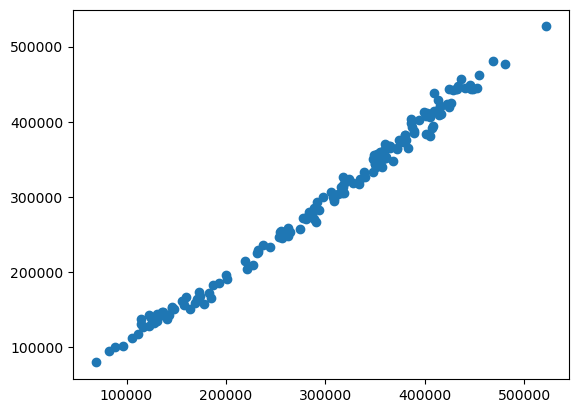

In [ ]:
plt.scatter(y_pred, y_test)

In [77]:
model = KNeighborsRegressor(n_neighbors= 3)
model.fit(x_train, y_train)

cv_score = cross_val_score(model, X, Y, scoring= 'r2')

print('the cross validation score for the Lasso reg : ', cv_score)
print('the mean cross validation score for the Lasso reg : ', cv_score.mean())

the cross validation score for the Lasso reg :  [0.80016829 0.27428136 0.91050139 0.6652081  0.53141438]
the mean cross validation score for the Lasso reg :  0.6363147027253806
